In [35]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import corner.corner

from impulse.impulse import pt_sample

# test model things:
from test_model import make_sin_data, LnLikelihood, LnPrior

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
x, data, omega_real, a_real, phi_real = make_sin_data(1000)

2.321640071814297 2.1953087448365602 0.09053629291363088


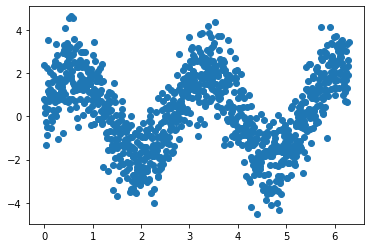

In [3]:
plt.scatter(x, data)

In [4]:
like = LnLikelihood(x, data)
prior = LnPrior([0, 0, 0], [3, 5, np.pi])

In [14]:
x0 = prior.initial_sample()
ndim = len(x0)

In [16]:
x0

array([0.18197766, 2.64460385, 2.85444722])

In [44]:
chain = pt_sample(like, prior, ndim, x0, num_samples=200_000)

100%|██████████| 200/200 [00:32<00:00,  6.10it/s]


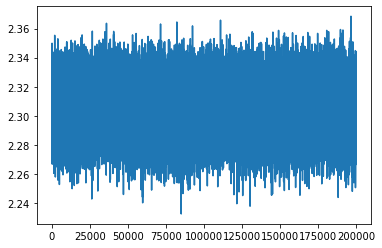

In [45]:
plt.plot(chain[:, 0, 1])

In [17]:
# chain = sample(like, prior, ndim, x0, num_samples=1_000_000)

100%|██████████| 1000/1000 [01:22<00:00, 12.15it/s]


In [46]:
burn = int(0.25 * chain.shape[0])
omega = np.median(chain[burn:, 0, 0])
a = np.median(chain[burn:, 1, 0])
phi = np.median(chain[burn:, 2, 0])

In [47]:
print(omega, omega_real)
print(a, a_real)
print(phi, phi_real)

2.305243215451061 2.321640071814297
2.0997153222036644 2.1953087448365602
0.1539023000981213 0.09053629291363088


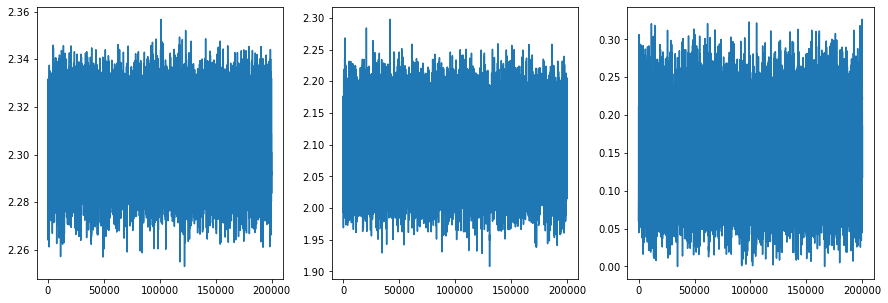

In [48]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(chain[:, 0, 0])
ax[1].plot(chain[:, 1, 0])
ax[2].plot(chain[:, 2, 0])
plt.show()

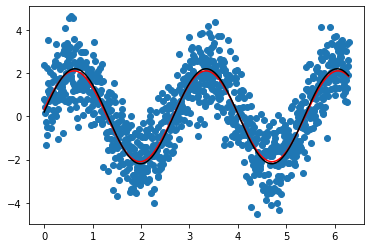

In [49]:
plt.scatter(x, data)
plt.plot(x, a * np.sin(omega * x + phi), color='red')
plt.plot(x, a_real * np.sin(omega_real * x + phi_real), color='black')

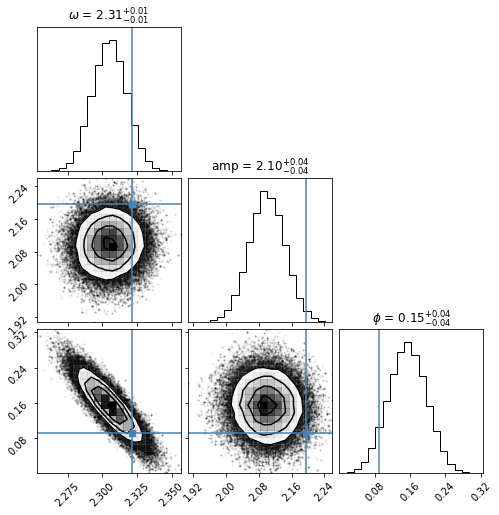

In [51]:
corner.corner(chain[burn:, :, 0], truths=[omega_real, a_real, phi_real],
              titles=[r'$\omega$', r'amp', r'$\phi$'], show_titles=True)
plt.show()

In [52]:
print(omega_real, a_real, phi_real)
print(omega, a, phi)

2.321640071814297 2.1953087448365602 0.09053629291363088
2.305243215451061 2.0997153222036644 0.1539023000981213
